In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
data = pd.read_csv("train.csv")
print("Dataset Loaded Successfully")
print(data.head())

Dataset Loaded Successfully
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SaleP

In [ ]:
features = ['OverallQual', 'GrLivArea', 'GarageCars',
'TotalBsmtSF']
target = 'SalePrice'
df = data[features + [target]].dropna() # drop missing rows
print("\nSelected Columns:")
print(df.head())


Selected Columns:
   OverallQual  GrLivArea  GarageCars  TotalBsmtSF  SalePrice
0            7       1710           2          856     208500
1            6       1262           2         1262     181500
2            7       1786           2          920     223500
3            7       1717           3          756     140000
4            8       2198           3         1145     250000


In [ ]:
X = df[features]
y = df[target]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.2, random_state=42
)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
print("\nModel Training Complete")
print("Intercept:", model.intercept_)
print("Coefficients:")
for col, coef in zip(features, model.coef_):
 print(f"{col}: {coef:.2f}")


Model Training Complete
Intercept: -94422.1245122955
Coefficients:
OverallQual: 23766.30
GrLivArea: 42.80
GarageCars: 19560.82
TotalBsmtSF: 28.40


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("\nEvaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.3f}")


Evaluation Metrics:
Mean Absolute Error (MAE): 25446.05
Mean Squared Error (MSE): 1602914819.44
Root Mean Squared Error (RMSE): 40036.42
R² Score: 0.791


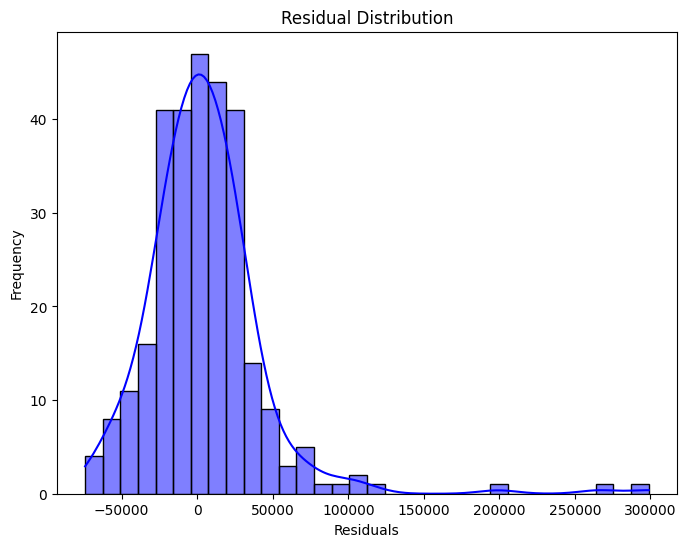

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True, color="blue")
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

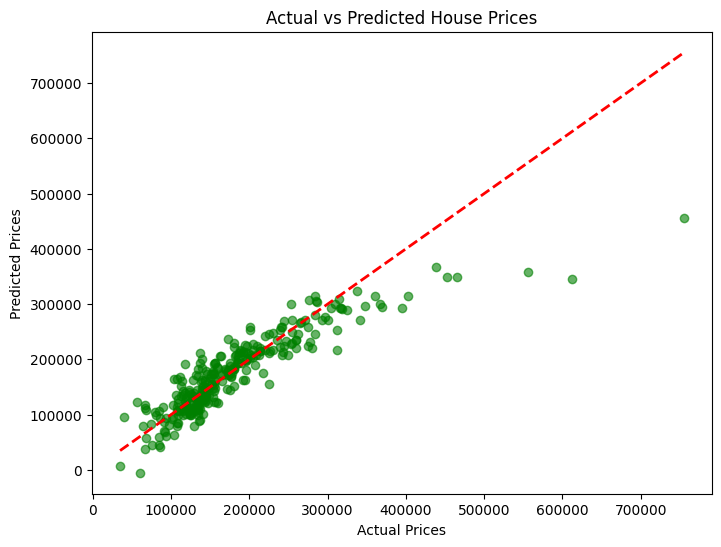

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color="green", alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()